In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
from tensorflow import keras
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential
# useful for building neural networks then interacting with

import os
# useful for manipulating folders and files

import cv2
from PIL import Image
# to manipulate images

import numpy as np
np.random.seed(1000)# for results reproduceability
# useful for manipulating matrix and multidimensional arrays

import matplotlib.pyplot as plt
# useful for plotting and showing  images


# To download checkpoints, Keras models, TFLite models
from google.colab import files

# Life is incomplete without this statement!
import tensorflow as tf


import os
import datetime

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

import tensorflow as tf

In [6]:
image_directory = os.listdir('/gdrive/MyDrive/Data/UTKFace/') 

In [4]:
image_path='/gdrive/MyDrive/DataSyrine/UTKFace/'

SIZE = 224  # our neural nets expect input data of same format so we will use resize our images to (size x size) 
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
gender_label = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.
age_label=[]

In [7]:
for i, image_name in enumerate(image_directory): 

  if (image_name.split('.')[1] == 'jpg') and i<12000:
    image =  tf.keras.preprocessing.image.load_img(
      image_path + image_name, grayscale=False, color_mode='rgb', target_size=(SIZE,SIZE))
    input_arr = keras.preprocessing.image.img_to_array(image)
    dataset.append(input_arr)
    gender_label.append(image_name.split('_')[1]) 


KeyboardInterrupt: ignored

In [8]:
len(gender_label)

6200

In [9]:
len(dataset)

6200

In [10]:
dataset[0].shape

(224, 224, 3)

In [11]:
dataset[0][30,30] #pixel x=30 , y=30 R G B 

array([176., 110.,  76.], dtype=float32)

In [12]:
gender_label[0]

'0'

In [13]:
NUM_CLASSES=2

In [14]:
IMG_SIZE=224

In [15]:
# Garbage Collector - use it like gc.collect()
import gc


gc.collect()

787

In [16]:
NUM_CLASSES

2

In [19]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 70

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(2)


Number of layers in the base model:  154


In [20]:
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)
tf.keras.utils.plot_model(model)
base_learning_rate = 0.0001

In [21]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


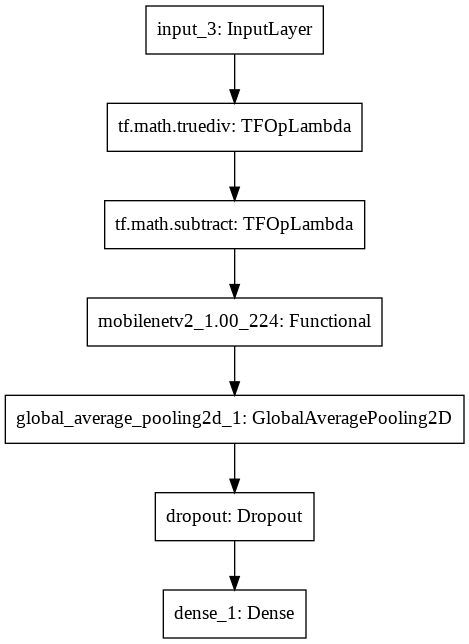

In [22]:
tf.keras.utils.plot_model(model)

In [23]:
type(dataset[0])

numpy.ndarray

In [24]:
type(gender_label)

list

In [25]:
label=[]
for i in gender_label:
  label.append(int(i))

In [26]:
label[0]

0

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # transforms labels from a number to 1-D array of 0s and 1s 

# we will split our **dataset** and its corresponding labels to two parts:
#80% will be used to train our model, and 20% will be used to test how good our trained model is. 
#X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(gender_label)), test_size = 0.20, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)

In [28]:
y_train = keras.utils.to_categorical(y_train)

In [31]:
initial_epochs = 10

fine_tune_epochs = 10
#total_epochs =  initial_epochs + fine_tune_epochs 
total_epochs =20 # @param {type: "slider", min:10, max:100}

history_fine = model.fit(np.array(X_train),np.array(y_train), epochs=total_epochs,  validation_split = 0.2, verbose=2,batch_size=30)

Epoch 1/20
133/133 - 47s - loss: 0.4569 - accuracy: 0.7976 - val_loss: 0.3645 - val_accuracy: 0.8468
Epoch 2/20
133/133 - 9s - loss: 0.3041 - accuracy: 0.8778 - val_loss: 0.2955 - val_accuracy: 0.8639
Epoch 3/20
133/133 - 9s - loss: 0.2545 - accuracy: 0.8984 - val_loss: 0.2446 - val_accuracy: 0.8992
Epoch 4/20
133/133 - 10s - loss: 0.2117 - accuracy: 0.9183 - val_loss: 0.3740 - val_accuracy: 0.8306
Epoch 5/20
133/133 - 10s - loss: 0.1831 - accuracy: 0.9284 - val_loss: 0.2171 - val_accuracy: 0.9103
Epoch 6/20
133/133 - 10s - loss: 0.1634 - accuracy: 0.9403 - val_loss: 0.2146 - val_accuracy: 0.9173
Epoch 7/20
133/133 - 10s - loss: 0.1377 - accuracy: 0.9536 - val_loss: 0.2770 - val_accuracy: 0.8881
Epoch 8/20
133/133 - 10s - loss: 0.1207 - accuracy: 0.9549 - val_loss: 0.2074 - val_accuracy: 0.9204
Epoch 9/20
133/133 - 10s - loss: 0.0994 - accuracy: 0.9640 - val_loss: 0.2702 - val_accuracy: 0.9083
Epoch 10/20
133/133 - 10s - loss: 0.0891 - accuracy: 0.9700 - val_loss: 0.5366 - val_accuracy

In [ ]:
#model.save("/gdrive/MyDrive/DataSyrine")

In [33]:
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']


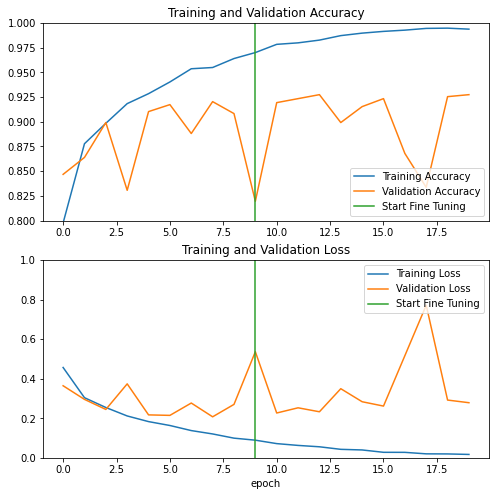

In [34]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [38]:
 len(X_test)

1240

In [49]:
y_test = keras.utils.to_categorical(y_test)

In [50]:
loss, accuracy = model.evaluate(np.array(X_test),np.array(y_test),verbose=2,batch_size=30)

42/42 - 2s - loss: 0.2965 - accuracy: 0.9137
